In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [16]:
data = pd.read_csv('project_data_user_count_30.csv',header=0)
data=data.dropna()

data1=data.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data1=data1.drop("genres", axis=1)

data1.loc[data1['average_user_rating']>=3.5, 'average_user_rating']=1
data1.loc[data1['average_user_rating']!=1, 'average_user_rating']=0
data2=data1

from sklearn.preprocessing import StandardScaler
data2_X=data2.drop('average_user_rating',axis=1)
data2_y=data2.loc[:,data2.columns=='average_user_rating']

data2_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']]=StandardScaler().fit_transform(data2_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']])



In [17]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(data2_X, data2_y, test_size=0.3, random_state=0)
columns=X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train.to_numpy().ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['average_user_rating'])

#check the numbers of dataset
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['average_user_rating']==0]))
print("Number of subscription",len(os_data_y[os_data_y['average_user_rating']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['average_user_rating']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['average_user_rating']==1])/len(os_data_X))

length of oversampled data is  7840
Number of no subscription in oversampled data 3920
Number of subscription 3920
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [18]:
logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y)
pred_log = logreg.predict(X_test)
print('Coefficient of each feature:\n', logreg.coef_)
print('Training accuracy:', logreg.score(os_data_X, os_data_y))
print('Test accuracy:', logreg.score(X_test, y_test))
print('')

logregLasso=LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
logregLasso.fit(os_data_X, os_data_y)
pred_Lasso = logregLasso.predict(X_test)
print('Coefficient of each feature:\n', logregLasso.coef_)
print('Training accuracy:', logregLasso.score(os_data_X, os_data_y))
print('Test accuracy:', logregLasso.score(X_test, y_test))
print('')
    
logregRidge=LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
logregRidge.fit(os_data_X, os_data_y)
pred_Ridge = logregRidge.predict(X_test)
print('Coefficient of each feature:\n', logregRidge.coef_)
print('Training accuracy:', logregRidge.score(os_data_X, os_data_y))
print('Test accuracy:', logregRidge.score(X_test, y_test))
print('')

logregElasticeNet=LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=0.1, solver='saga')
logregElasticeNet.fit(os_data_X, os_data_y)
pred_Elas = logregElasticeNet.predict(X_test)
print('Coefficient of each feature:\n', logregElasticeNet.coef_)
print('Training accuracy:', logregElasticeNet.score(os_data_X, os_data_y))
print('Test accuracy:', logregElasticeNet.score(X_test, y_test))
print('')

/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array w

Coefficient of each feature:
 [[ 1.0672476   0.15780137  0.05284535  0.47386739  0.35830399  0.15489301
  -0.27687966 -0.22200844 -0.06466304  1.23486471]]
Training accuracy: 0.6919642857142857
Test accuracy: 0.7046979865771812

Coefficient of each feature:
 [[ 0.90842328  0.14860694  0.0507775   0.          0.35358355  0.15512804
  -0.26876672 -0.23214214 -0.06150768  1.18443856]]
Training accuracy: 0.6903061224489796
Test accuracy: 0.7030201342281879

Coefficient of each feature:
 [[ 0.91317869  0.14962107  0.05556222  0.12672372  0.35836241  0.16056733
  -0.27017234 -0.23129504 -0.06558695  1.18747764]]
Training accuracy: 0.6910714285714286
Test accuracy: 0.7019015659955258

Coefficient of each feature:
 [[ 0.89492693  0.15267681  0.05223149  0.14416897  0.35437039  0.15450633
  -0.26853143 -0.23022176 -0.06276377  1.20347933]]
Training accuracy: 0.6914540816326531
Test accuracy: 0.7030201342281879



/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [19]:
t = y_test.values.ravel().tolist()
p = pred_log.tolist()
print(len(t), len(p))
confusion_matrix1 = confusion_matrix(t,p)
confusion_matrix1

1788 1788


array([[  63,   46],
       [ 482, 1197]])

In [20]:
t = y_test.values.ravel().tolist()
p = pred_Lasso.tolist()
print(len(t), len(p))
confusion_matrix2 = confusion_matrix(t,p)
confusion_matrix2

1788 1788


array([[  63,   46],
       [ 485, 1194]])

In [21]:
t = y_test.values.ravel().tolist()
p = pred_Ridge.tolist()
print(len(t), len(p))
confusion_matrix3 = confusion_matrix(t,p)
confusion_matrix3

1788 1788


array([[  63,   46],
       [ 487, 1192]])

In [22]:
t = y_test.values.ravel().tolist()
p = pred_Elas.tolist()
print(len(t), len(p))
confusion_matrix4 = confusion_matrix(t,p)
confusion_matrix4

1788 1788


array([[  63,   46],
       [ 485, 1194]])

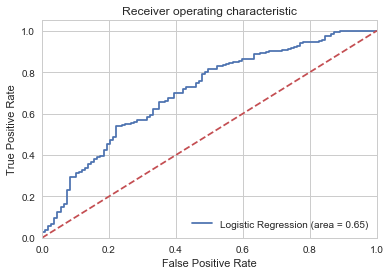

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [36]:
data_validation_X,data_validation_y=os.fit_sample(data2_X, data2_y.to_numpy().ravel())

logreg = LogisticRegression()
LRC_acc = cross_val_score(logreg, data_validation_X, data_validation_y, cv=10,scoring='accuracy')

print(LRC_acc)
print(LRC_acc.mean())

[0.42321429 0.56160714 0.61964286 0.675      0.69910714 0.73035714
 0.74017857 0.74821429 0.73458445 0.71671135]
0.6648617228392697
